<a href="https://colab.research.google.com/github/hightechguys79/MSAI/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Load patients data

# d1 = files.upload()
# patients = pd.read_csv('PATIENTS.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.patients`
"""
query_job = bq_client.query(query)
patients = query_job.to_dataframe()

In [10]:
#@title Enter Google Cloud/BigQuery Project ID
project_id = 'still-smithy-449518-b7' #@param{type:"string"}

# Package used for interfacing w/ BigQuery from Python
from google.cloud import bigquery

import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

# Create BigQuery client
bq_client = bigquery.Client(project = project_id)

   ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID  STARTDATE    ENDDATE DRUG_TYPE  \
0  231760       27542   184604      289879 2197-12-07 2197-12-07  ADDITIVE   

               DRUG DRUG_NAME_POE DRUG_NAME_GENERIC FORMULARY_DRUG_CD   GSN  \
0  Bupivacaine 0.1%          None              None              None  None   

    NDC PROD_STRENGTH DOSE_VAL_RX DOSE_UNIT_RX FORM_VAL_DISP FORM_UNIT_DISP  \
0  <NA>          None           1        mg/ml          None           None   

  ROUTE  
0    ED  


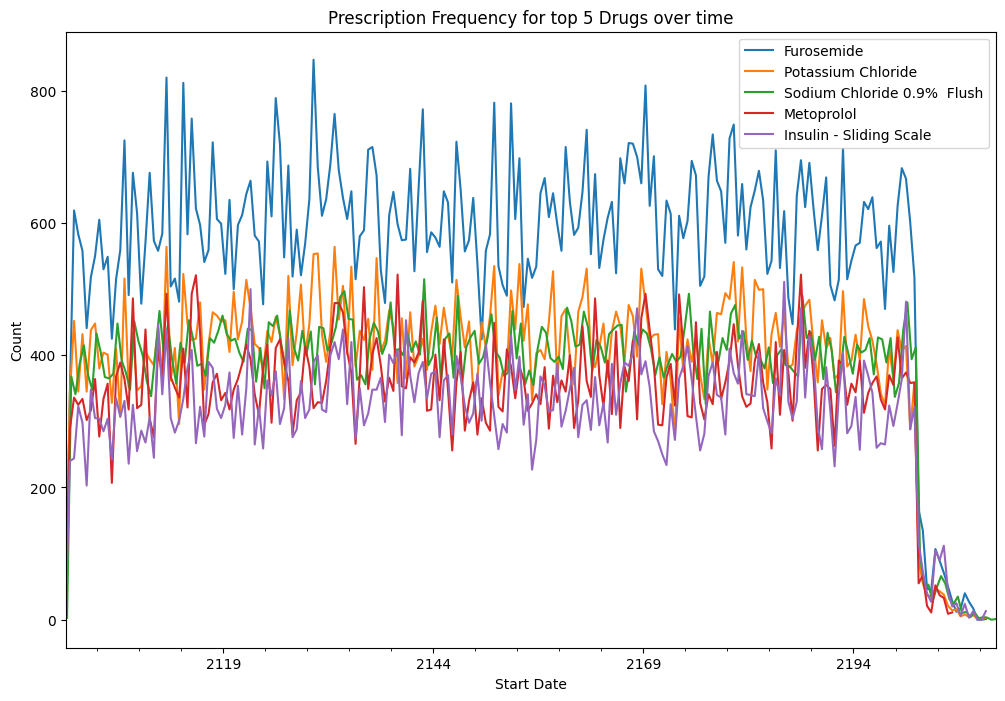

In [12]:
# Define the query to retrieve data from the MIMIC-III admissions table

query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.prescriptions`
"""

# Run the query and fetch the results
query_job = bq_client.query(query)

# Get the results as a pandas DataFrame
df = query_job.to_dataframe()

# Display the DataFrame
print(df.head(1))

drug_counts= df['DRUG_NAME_GENERIC'].value_counts().nlargest(5)
#Plot the time series for the top 5 prescribed drugs
fig, ax = plt.subplots(figsize=(12,8))
for drug in drug_counts.index:
  drug_df = df[df["DRUG_NAME_GENERIC"]==drug]
  drug_df.resample('6ME',on='STARTDATE').size().plot(ax=ax, label=drug)
ax.set_title('Prescription Frequency for top 5 Drugs over time')
ax.set_ylabel('Count')
ax.set_xlabel('Start Date')
ax.legend()
plt.show()

In [13]:
# Load admissions data
#d2 = files.upload()
#admissions = pd.read_csv('ADMISSIONS.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.admissions`
"""
query_job = bq_client.query(query)
admissions = query_job.to_dataframe()

In [14]:
# Load diagnoses_icd data
#d3 = files.upload()
#diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.diagnoses_icd`
"""
query_job = bq_client.query(query)
diagnoses = query_job.to_dataframe()

In [15]:
# Load ICUSTAYS data
# d4 = files.upload()
# icustays = pd.read_csv('ICUSTAYS.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.icustays`
"""
query_job = bq_client.query(query)
icustays = query_job.to_dataframe()

In [16]:
# Load D_ICD_DIAGNOSES data
# d4 = files.upload()
# diagnoses_labels = pd.read_csv('D_ICD_DIAGNOSES.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.diagnoses_icd`
"""
query_job = bq_client.query(query)
diagnoses_labels = query_job.to_dataframe()

## Patients Table

In [19]:
from datetime import datetime
df = patients
# Calculate age function
def calculate_age(dob, dod):
    # Convert dob and dod to datetime objects, handling NaT (Not a Time) values
    dob_date = pd.to_datetime(dob, errors='coerce')  # Use errors='coerce' to handle NaT
    dod_date = pd.to_datetime(dod, errors='coerce')  # Use errors='coerce' to handle NaT

    # Calculate age only if both dob_date and dod_date are valid datetime objects
    if pd.notna(dob_date) and pd.notna(dod_date):
        age = (dod_date - dob_date).days // 365
    else:
        age = pd.NA  # Assign pd.NA if either date is missing
    return age

# Apply calculate_age function to create "age" column
df["age"] = df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1) # Changed column names to "DOB" and "DOD"


# Filter out rows with age greater than or equal to 120 and those with invalid ages (pd.NA)
filtered_df = df[(df["age"] < 120) & (df['age'].notna())]  # Added condition to filter out pd.NA ages

# Display the updated DataFrame
print(filtered_df.head())

   ROW_ID  SUBJECT_ID GENDER        DOB        DOD   DOD_HOSP    DOD_SSN  \
1   17808       18848      F 2042-08-21 2128-01-08 2128-01-08 2128-01-08   
2   36390       61056      F 2067-04-11 2152-01-08 2152-01-08 2152-01-08   
3   25371       26889      F 2115-11-04 2164-01-08 2164-01-08 2164-01-08   
4   17328       18333      F 2094-01-21 2168-01-08 2168-01-08 2168-01-08   
5    7313        7730      F 2166-03-28 2196-01-08 2196-01-08 2196-01-08   

   EXPIRE_FLAG age  
1            1  85  
2            1  84  
3            1  48  
4            1  74  
5            1  29  


In [21]:
filtered_df["EXPIRE_FLAG"].value_counts()


,count
EXPIRE_FLAG,
1,14279


In [22]:
filtered_df["age"].value_counts()

,count
age,
83,503
84,484
81,484
79,475
86,472
...,...
18,3
1,1
98,1


In [24]:
filtered_df["GENDER"].value_counts()

,count
GENDER,
M,7982
F,6297


In [ ]:
filtered_df['age'].describe()

count    92.000000
mean     70.608696
std      17.237167
min      20.000000
25%      65.000000
50%      77.000000
75%      83.000000
max      91.000000
Name: age, dtype: float64

In [ ]:
filtered_df['age'].loc[df['gender'] == 'F'].describe()

count    50.000000
mean     73.060000
std      17.219365
min      20.000000
25%      68.000000
50%      79.500000
75%      84.500000
max      91.000000
Name: age, dtype: float64

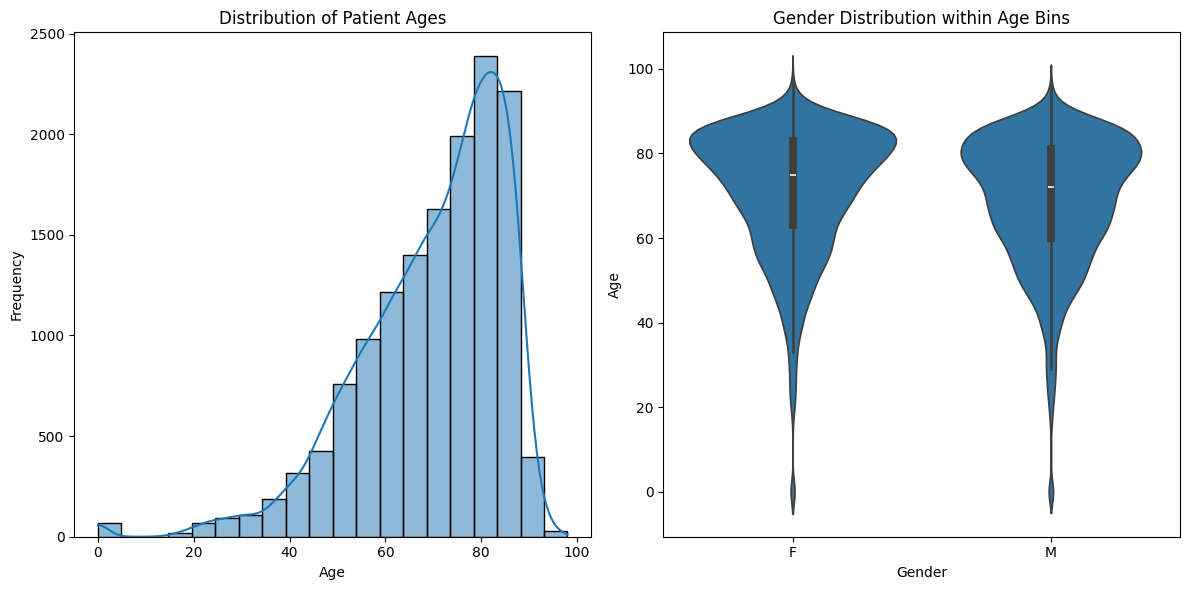

In [26]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot - Age distribution
plt.subplot(1, 2, 1)
sns.histplot(data=filtered_df, x='age', bins=20, kde=True)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Second subplot - Gender distribution within each age bin
plt.subplot(1, 2, 2)
sns.violinplot(data=filtered_df, x='GENDER', y='age', inner='box')
plt.title("Gender Distribution within Age Bins")
plt.xlabel("Gender")
plt.ylabel("Age")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Patients and Admissions Table

In [28]:
# Merge admissions and patients data on subject_id
merged_data = pd.merge(admissions, filtered_df, on="SUBJECT_ID")
merged_data.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,age
0,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,6738,M,2135-11-25,2188-08-02,NaT,2188-08-02,1,52
1,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,9793,F,2049-06-08,2133-06-19,NaT,2133-06-19,1,84
2,25262,20691,119601,2198-02-09 14:58:00,2198-02-20 15:33:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,...,0,1,19525,F,2131-10-14,2202-01-16,NaT,2202-01-16,1,70
3,1654,1340,169611,2193-12-17 11:08:00,2193-12-19 13:12:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,0,1,1274,F,2115-10-16,2198-09-03,NaT,2198-09-03,1,82
4,16917,13809,188102,2181-10-27 02:52:00,2181-10-29 14:07:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,0,1,13057,M,2135-11-20,2183-05-05,NaT,2183-05-05,1,47


In [30]:
merged_data['ADMISSION_TYPE'].value_counts()

,count
ADMISSION_TYPE,
EMERGENCY,17755
ELECTIVE,2123
URGENT,655
NEWBORN,65


In [32]:
merged_data['ADMISSION_LOCATION'].value_counts()

,count
ADMISSION_LOCATION,
EMERGENCY ROOM ADMIT,10694
TRANSFER FROM HOSP/EXTRAM,3720
CLINIC REFERRAL/PREMATURE,3081
PHYS REFERRAL/NORMAL DELI,2885
TRANSFER FROM SKILLED NUR,166
TRANSFER FROM OTHER HEALT,43
** INFO NOT AVAILABLE **,5
HMO REFERRAL/SICK,4


In [34]:
merged_data['INSURANCE'].value_counts()

,count
INSURANCE,
Medicare,14113
Private,4567
Medicaid,1502
Government,290
Self Pay,126


In [36]:
merged_data['DISCHARGE_LOCATION'].value_counts()

,count
DISCHARGE_LOCATION,
DEAD/EXPIRED,5305
HOME HEALTH CARE,3841
SNF,3383
REHAB/DISTINCT PART HOSP,2995
HOME,2887
LONG TERM CARE HOSPITAL,967
DISC-TRAN CANCER/CHLDRN H,362
HOSPICE-HOME,308
SHORT TERM HOSPITAL,220


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'SNF'),
  Text(1, 0, 'HOME'),
  Text(2, 0, 'DEAD/EXPIRED'),
  Text(3, 0, 'HOME HEALTH CARE'),
  Text(4, 0, 'REHAB/DISTINCT PART HOSP'),
  Text(5, 0, 'DISC-TRAN CANCER/CHLDRN H'),
  Text(6, 0, 'LONG TERM CARE HOSPITAL'),
  Text(7, 0, 'HOSPICE-HOME'),
  Text(8, 0, 'SHORT TERM HOSPITAL'),
  Text(9, 0, 'DISC-TRAN TO FEDERAL HC'),
  Text(10, 0, 'HOSPICE-MEDICAL FACILITY'),
  Text(11, 0, 'DISCH-TRAN TO PSYCH HOSP'),
  Text(12, 0, 'HOME WITH HOME IV PROVIDR'),
  Text(13, 0, 'LEFT AGAINST MEDICAL ADVI'),
  Text(14, 0, 'ICF'),
  Text(15, 0, 'OTHER FACILITY'),
  Text(16, 0, 'SNF-MEDICAID ONLY CERTIF')])

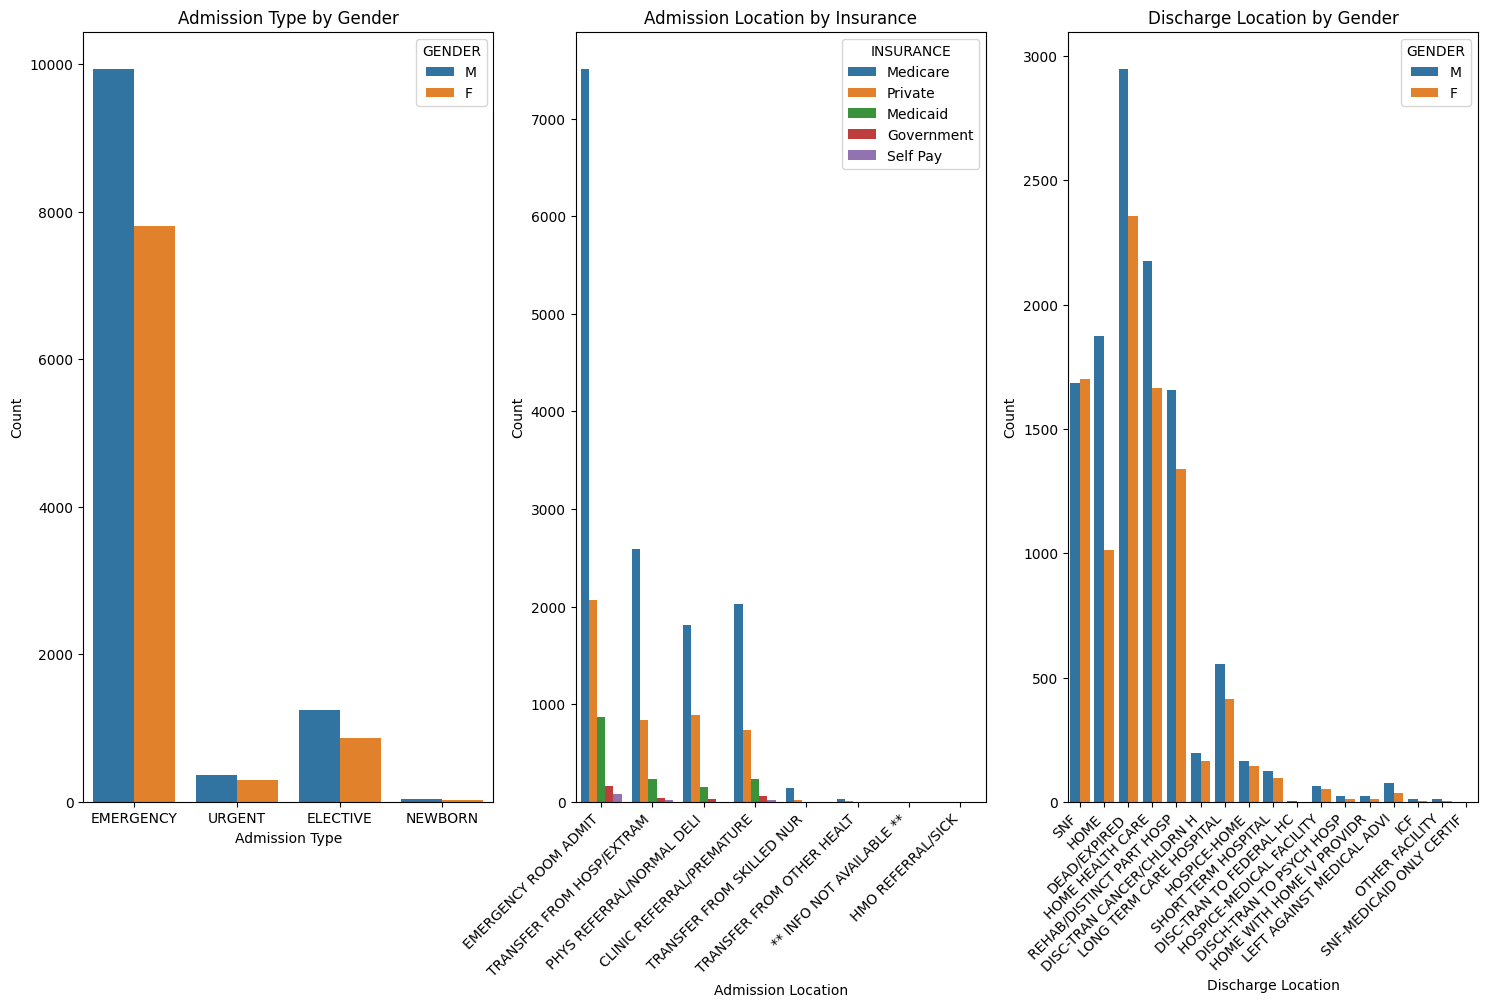

In [41]:
# Create a complex visualization
plt.figure(figsize=(18, 10))

# Analysis 1: Count plot of Admission Types by Gender
plt.subplot(1, 3, 1)
sns.countplot(data=merged_data, x='ADMISSION_TYPE', hue='GENDER')
plt.title("Admission Type by Gender")
plt.xlabel("Admission Type")
plt.ylabel("Count")

# Analysis 2: Count plot of Admission Locations by Insurance
plt.subplot(1, 3, 2)
sns.countplot(data=merged_data, x='ADMISSION_LOCATION', hue='INSURANCE')
plt.title("Admission Location by Insurance")
plt.xlabel("Admission Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Analysis 3: Count plot of Discharge Locations by Gender
plt.subplot(1, 3, 3)
sns.countplot(data=merged_data, x='DISCHARGE_LOCATION', hue='GENDER')
plt.title("Discharge Location by Gender")
plt.xlabel("Discharge Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

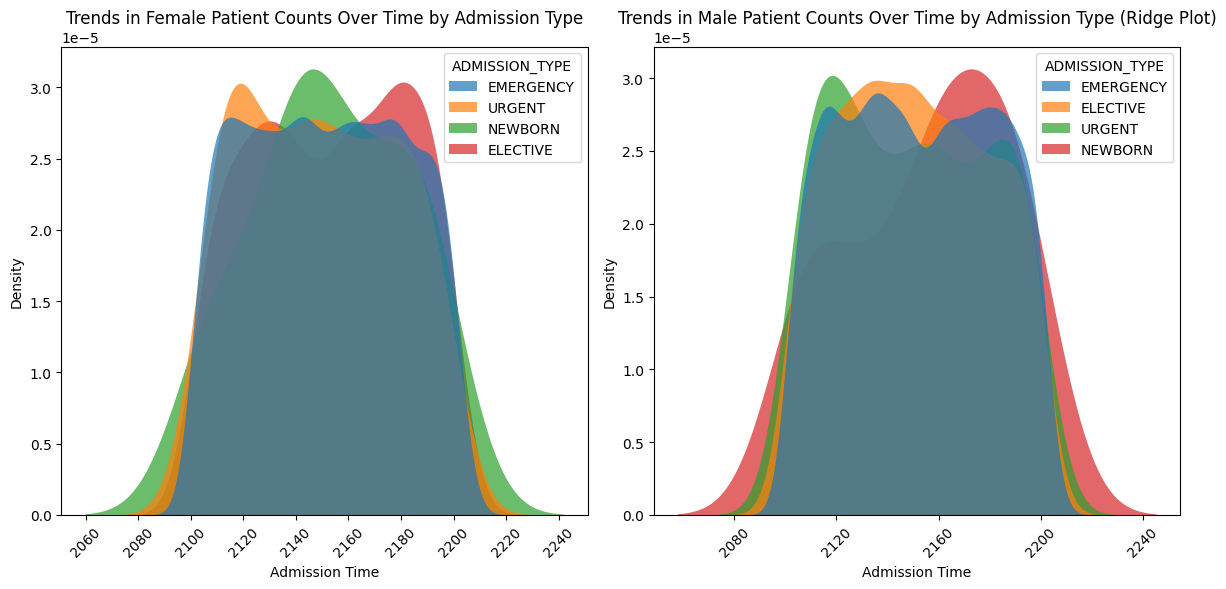

In [43]:
merged_data['ADMITTIME'] = pd.to_datetime(merged_data['ADMITTIME'])  # Convert to datetime

# Filter data for male and female patients
male_data = merged_data[merged_data['GENDER'] == 'M']
female_data = merged_data[merged_data['GENDER'] == 'F']

# Create separate Ridge Plots for male and female patients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=female_data, x='ADMITTIME', hue='ADMISSION_TYPE', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='Female')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Trends in Female Patient Counts Over Time by Admission Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.kdeplot(data=male_data, x='ADMITTIME', hue='ADMISSION_TYPE', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='Male')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Trends in Male Patient Counts Over Time by Admission Type (Ridge Plot)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Different types of plots that convey same information

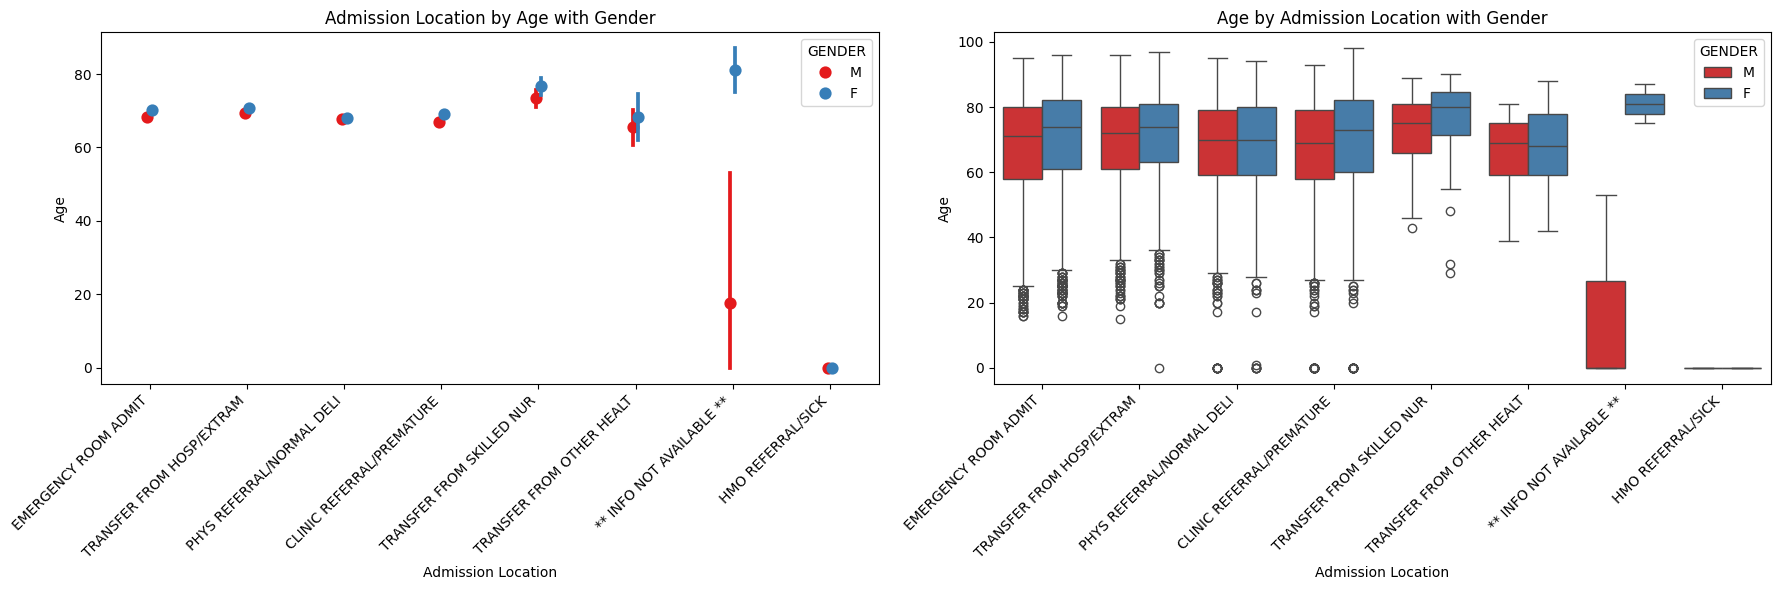

In [45]:
# Create a complex visualization using subplots
plt.figure(figsize=(18, 6))

# Point plot of Admission Location by Age with Gender color hue
plt.subplot(1, 2, 1)
sns.pointplot(data=merged_data, x='ADMISSION_LOCATION', y='age', hue='GENDER', palette='Set1', dodge=True, linestyles="")
plt.title("Admission Location by Age with Gender")
plt.xlabel("Admission Location")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')

# Box plot of Age by Admission Location with Gender color hue
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, x='ADMISSION_LOCATION', y='age', hue='GENDER', palette='Set1')
plt.title("Age by Admission Location with Gender")
plt.xlabel("Admission Location")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
merged_data['religion'].value_counts()

CATHOLIC               58
NOT SPECIFIED          19
UNOBTAINABLE           16
PROTESTANT QUAKER       9
JEWISH                  7
CHRISTIAN SCIENTIST     3
OTHER                   3
MUSLIM                  2
BUDDHIST                1
ROMANIAN EAST. ORTH     1
Name: religion, dtype: int64

In [ ]:
merged_data['ethnicity'].value_counts()

WHITE                                                       80
HISPANIC/LATINO - PUERTO RICAN                              15
UNKNOWN/NOT SPECIFIED                                       10
BLACK/AFRICAN AMERICAN                                       5
OTHER                                                        3
ASIAN                                                        2
HISPANIC OR LATINO                                           2
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE     2
UNABLE TO OBTAIN                                             1
Name: ethnicity, dtype: int64

## Heatmap

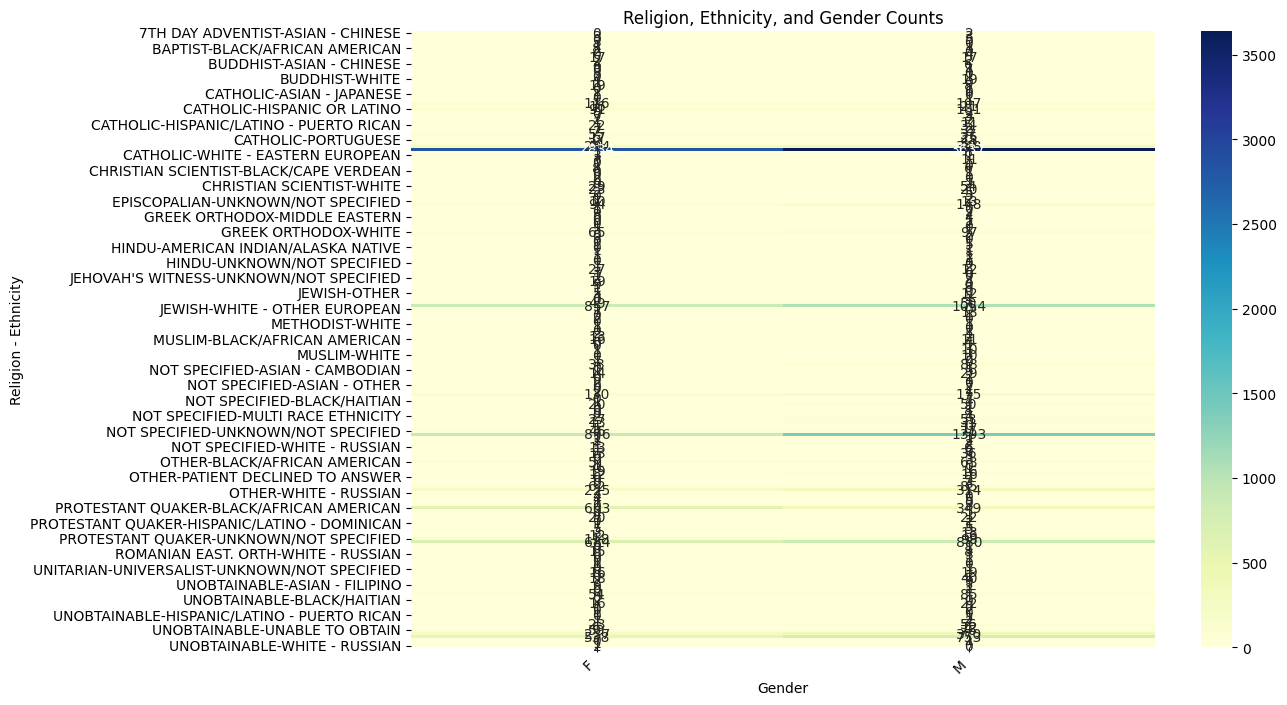

In [50]:
# Create a pivot table to prepare data for the heatmap
# Check if 'religion' is a valid column name; otherwise, use the correct column name
pivot_table = merged_data.groupby(['RELIGION', 'ETHNICITY', 'GENDER']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Religion, Ethnicity, and Gender Counts")
plt.xlabel("Gender")
plt.ylabel("Religion - Ethnicity")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

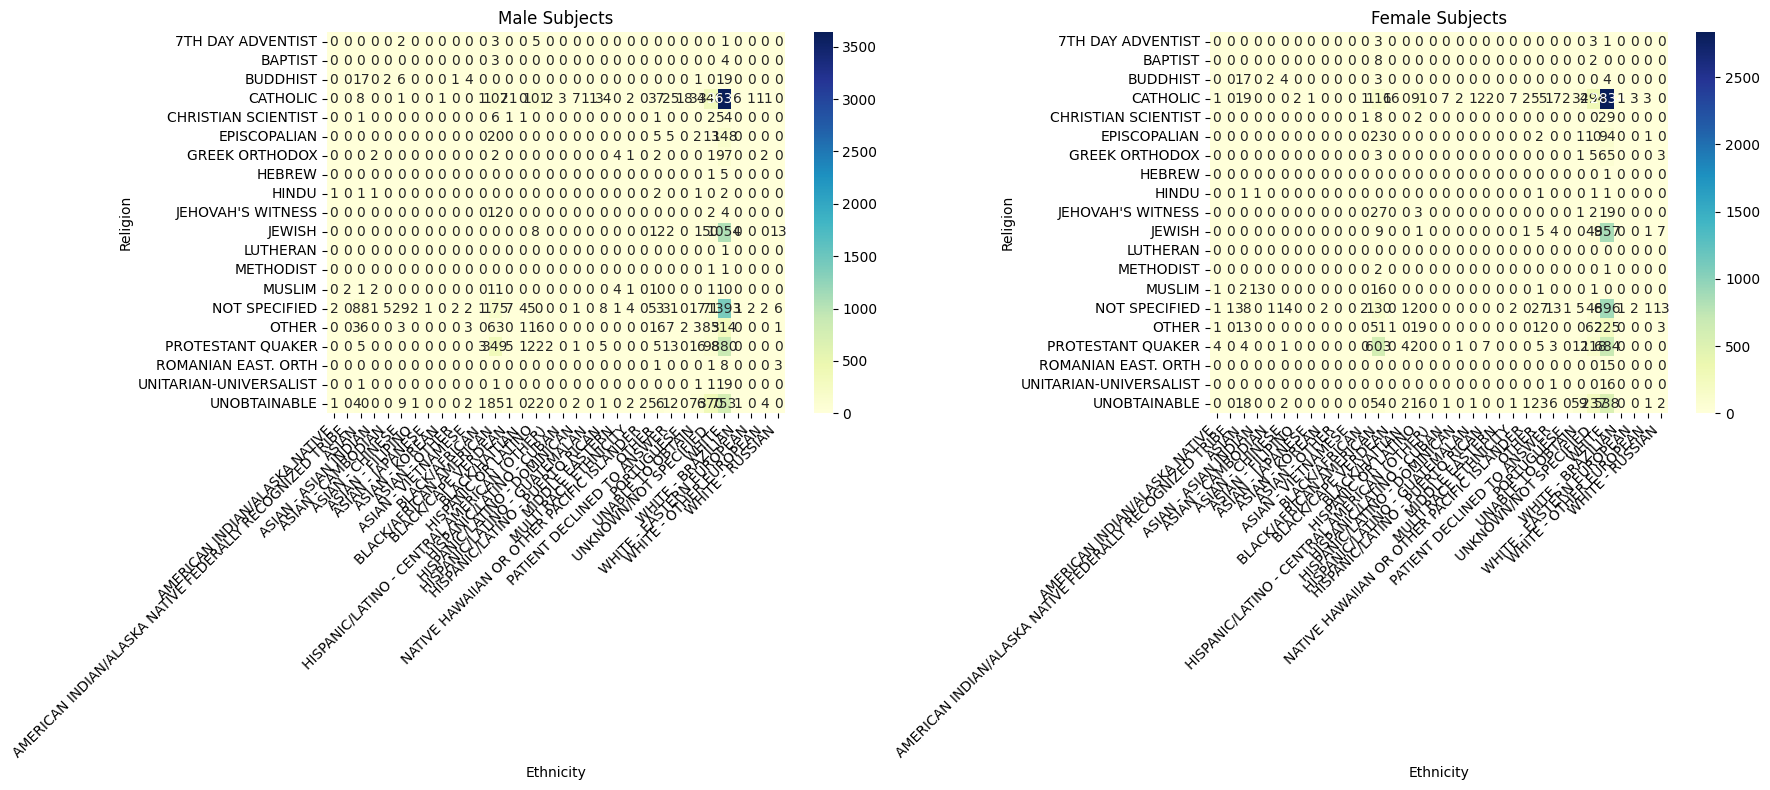

In [53]:
# Create a cross-tabulation of religion, ethnicity, and gender
cross_tab = pd.crosstab(index=[merged_data['RELIGION'], merged_data['ETHNICITY']], columns=merged_data['GENDER'])

# Reset the index for better plot compatibility
cross_tab = cross_tab.reset_index()

# Melt the cross-tabulation for heatmaps
melted_cross_tab = pd.melt(cross_tab, id_vars=['RELIGION', 'ETHNICITY'], value_vars=['M', 'F'], var_name='GENDER')

# Create separate heatmaps for male and female subjects using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Male Subjects Heatmap
male_pivot = melted_cross_tab[melted_cross_tab['GENDER'] == 'M'].pivot_table(index='RELIGION', columns='ETHNICITY', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(male_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Male Subjects")
axes[0].set_xlabel("Ethnicity")
axes[0].set_ylabel("Religion")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Female Subjects Heatmap
female_pivot = melted_cross_tab[melted_cross_tab['GENDER'] == 'F'].pivot_table(index='RELIGION', columns='ETHNICITY', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(female_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Female Subjects")
axes[1].set_xlabel("Ethnicity")
axes[1].set_ylabel("Religion")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Patients, Admissions, and Diagnosis_icd Tables

In [61]:
# Convert the DataFrame to a dictionary to link icd9 codes to respective labels
#print(diagnoses_labels.head())

icd9_dict = diagnoses_labels.set_index('ICD9_CODE')['SHORT_TITLE'].to_dict()

# # Print the dictionary
print(icd9_dict)

{'436': 'Cva', '78001': 'Coma', 'E0062': 'Golf', '0460': 'Kuru', '30752': 'Pica', 'E9601': 'Rape', 'E0051': 'Yoga', '78603': 'Apnea', '4292': 'Ascvd', '7897': 'Colic', '7862': 'Cough', '4644': 'Croup', '7823': 'Edema', '68101': 'Felon', 'E0072': 'Rugby', '1360': 'Ainhum', '31501': 'Alexia', '43884': 'Ataxia', 'E0080': 'Boxing', '7271': 'Bunion', '05101': 'Cowpox', '061': 'Dengue', '3671': 'Myopia', '78261': 'Pallor', '071': 'Rabies', '99591': 'Sepsis', 'E0121': 'Sewing', 'E0075': 'Soccer', '7817': 'Tetany', '1120': 'Thrush', '37931': 'Aphakia', '7843': 'Aphasia', '78441': 'Aphonia', 'E0063': 'Bowling', '4280': 'CHF NOS', 'E0050': 'Dancing', '7881': 'Dysuria', 'E0083': 'Frisbee', '1025': 'Gangosa', '36441': 'Hyphema', 'E0133': 'Ironing', 'E0131': 'Laundry', '1252': 'Loiasis', '7242': 'Lumbago', '1340': 'Myiasis', 'E0103': 'Pilates', '6982': 'Prurigo', 'V211': 'Puberty', '0830': 'Q fever', '6953': 'Rosacea', 'E0011': 'Running', '1330': 'Scabies', '05912': 'Sealpox', '7861': 'Stridor', '6

Creating a dictionary instead of joining two tables is more efficient. However, the impact depends on several factors. Proper indexing, query optimization, and consideration of your specific database system and hardware resources can help mitigate performance issues when joining tables, whereas creating a dictionary is easier and efficient as it uses the concept of hashing.

In [64]:
# Merge diagnosis_icd with admissions on subject_id
merged_data_diagnosis = pd.merge(merged_data, diagnoses, on='SUBJECT_ID', how='inner')

# Get the top diagnosis codes for each gender
top_diagnosis_codes_male = merged_data_diagnosis[merged_data_diagnosis['GENDER'] == 'M']['ICD9_CODE'].value_counts().head(10)
top_diagnosis_codes_female = merged_data_diagnosis[merged_data_diagnosis['GENDER'] == 'F']['ICD9_CODE'].value_counts().head(10)

<ipython-input-65-a10d1991e88f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnosis_codes_male.values, y=top_diagnosis_codes_male.index, palette='viridis')
<ipython-input-65-a10d1991e88f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnosis_codes_female.values, y=top_diagnosis_codes_female.index, palette='viridis')


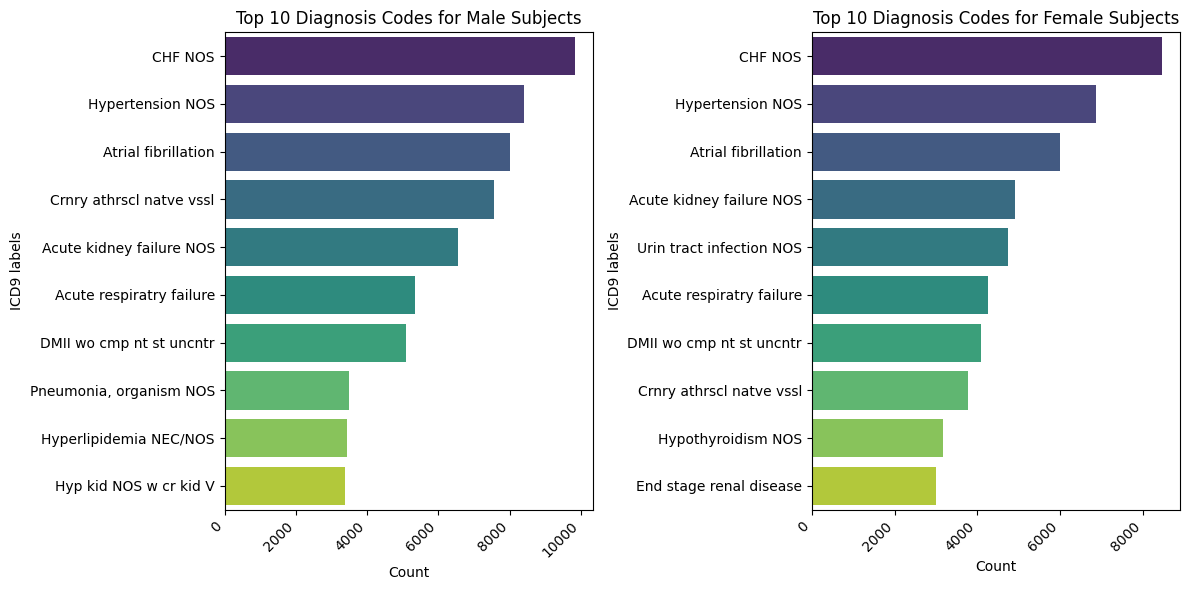

In [65]:
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Subplot for Male Subjects
plt.subplot(1, 2, 1)
sns.barplot(x=top_diagnosis_codes_male.values, y=top_diagnosis_codes_male.index, palette='viridis')
plt.title("Top 10 Diagnosis Codes for Male Subjects")
plt.xlabel("Count")
plt.ylabel("ICD9 labels")
plt.xticks(rotation=45, ha='right')

# Label the x-axis ticks with short titles
male_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_male.index]
plt.yticks(range(10), male_short_titles)

# Subplot for Female Subjects
plt.subplot(1, 2, 2)
sns.barplot(x=top_diagnosis_codes_female.values, y=top_diagnosis_codes_female.index, palette='viridis')
plt.title("Top 10 Diagnosis Codes for Female Subjects")
plt.xlabel("Count")
plt.ylabel("ICD9 labels")
plt.xticks(rotation=45, ha='right')

# Label the x-axis ticks with short titles
female_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_female.index]
plt.yticks(range(10), female_short_titles)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The above plots can be visualized using another python library Plotly. The plots are more interactive and easy to visualize

In [66]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame for male and female diagnosis codes
male_df = pd.DataFrame({'icd9_code': top_diagnosis_codes_male.index, 'count': top_diagnosis_codes_male.values})
female_df = pd.DataFrame({'icd9_code': top_diagnosis_codes_female.index, 'count': top_diagnosis_codes_female.values})

# Map ICD-9 codes to short titles
male_df['labels'] = male_df['icd9_code'].map(icd9_dict)
female_df['labels'] = female_df['icd9_code'].map(icd9_dict)

# Create a new column 'hover_text' that combines 'icd9_code', 'labels', and 'count'
male_df['hover_text'] = male_df['icd9_code'] + '<br>Disease name: ' + male_df['labels'] + '<br>ICD-9 Code: ' + male_df['icd9_code'] + '<br>Count: ' + male_df['count'].astype(str)
female_df['hover_text'] = female_df['icd9_code'] + '<br>Disease name: ' + female_df['labels'] + '<br>ICD-9 Code: ' + female_df['icd9_code'] + '<br>Count: ' + female_df['count'].astype(str)

# Create treemaps using Plotly Graph Objects with custom hover data and template
fig_male = go.Figure(go.Treemap(
    labels=male_df['labels'],
    parents=[''] * len(male_df),  # Set parent to empty string to remove parent levels
    values=male_df['count'],
    customdata=male_df[['icd9_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_male.update_layout(title='Top 10 Diagnosis Codes for Male Subjects')

fig_female = go.Figure(go.Treemap(
    labels=female_df['labels'],
    parents=[''] * len(female_df),  # Set parent to empty string to remove parent levels
    values=female_df['count'],
    customdata=female_df[['icd9_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_female.update_layout(title='Top 10 Diagnosis Codes for Female Subjects')

# Show the treemaps
fig_male.show()
fig_female.show()


In [68]:
icustays

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,21891,17239,156279,203333,both,CCU,CCU,7,7,2133-10-23 15:19:16,2133-10-29 21:27:49,6.2559
1,35298,27810,118521,299036,both,CCU,CCU,7,7,2122-08-07 14:35:31,2122-08-09 22:45:29,2.3403
2,39733,31454,117800,209490,both,CCU,CCU,7,7,2143-08-21 00:20:52,2143-08-24 14:28:40,3.5888
3,37755,29805,196011,212996,both,CCU,CCU,7,7,2154-07-02 12:09:06,2154-07-08 14:23:46,6.0935
4,34046,26849,199270,298791,both,CCU,CCU,7,7,2136-08-01 16:35:56,2136-08-04 18:50:08,3.0932
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59786,94889,147635,252338,metavision,SICU,SICU,57,57,2124-11-22 21:55:59,2124-11-24 18:04:42,1.8394
61528,59787,94896,167802,242378,metavision,SICU,SICU,57,57,2200-02-26 18:40:12,2200-02-27 12:16:19,0.7334
61529,59797,94924,186391,290051,metavision,SICU,SICU,57,57,2134-01-08 21:59:39,2134-01-09 18:29:16,0.8539
61530,59804,94937,156213,293838,metavision,SICU,SICU,57,57,2107-02-05 17:16:52,2107-02-06 21:53:10,1.1919


##Time series plots

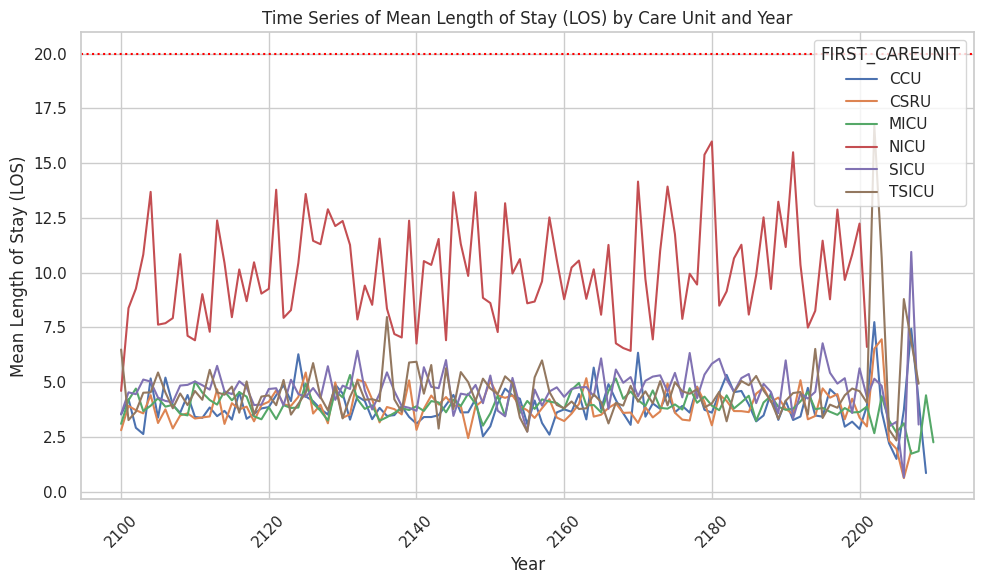

In [72]:
icustays['INTIME'] = pd.to_datetime(icustays['INTIME'])
icustays['OUTTIME'] = pd.to_datetime(icustays['OUTTIME'])

# Extract the year from 'intime'
icustays['intime_year'] = icustays['INTIME'].dt.year

# Calculate the mean LOS for each care unit and year
los_stats = icustays.groupby(['FIRST_CAREUNIT', 'intime_year'])['LOS'].mean().reset_index()

# Plot the time series of mean LOS by care unit and year
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(data=los_stats, x='intime_year', y='LOS', hue='FIRST_CAREUNIT')

# Add a horizontal dotted line to identify the threshold
threshold = 20  # Set your threshold value here
plt.axhline(y=threshold, color='red', linestyle='dotted', label=f'Threshold ({threshold})')

plt.title("Time Series of Mean Length of Stay (LOS) by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# Create an interactive line plot using Plotly Express
import plotly.express as px
fig = px.line(los_stats, x='intime_year', y='LOS', color='FIRST_CAREUNIT',
              title='Time Series of Mean Length of Stay (LOS) by Care Unit and Year',
              labels={'intime_year': 'Year', 'los': 'Mean Length of Stay (LOS)'},
              template='plotly_white')

# Add a horizontal line to indicate the threshold
fig.add_hline(y=threshold, line_dash="dash", line_color="red", annotation_text=f'Threshold ({threshold})')

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

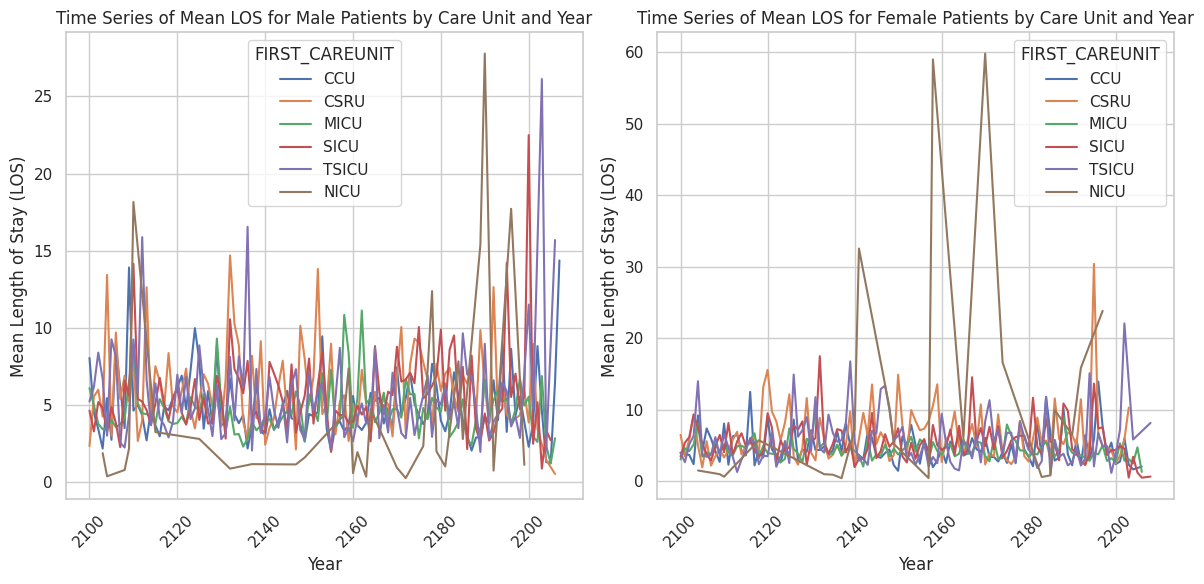

In [79]:
# Merge icustays, admissions and patients on subject_id
merged_data_icu = pd.merge(icustays, merged_data, on='SUBJECT_ID', how='inner')

# Extract the year from 'intime'
merged_data_icu['intime_year'] = merged_data_icu['INTIME'].dt.year

# Filter data for male and female patients
male_data = merged_data_icu[merged_data_icu['GENDER'] == 'M']
female_data = merged_data_icu[merged_data_icu['GENDER'] == 'F']

# Create separate time series plots for male and female patients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
sns.lineplot(data=male_data.groupby(['intime_year', 'FIRST_CAREUNIT'])['LOS'].mean().reset_index(),
             x='intime_year', y='LOS', hue='FIRST_CAREUNIT')
plt.title("Time Series of Mean LOS for Male Patients by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
sns.lineplot(data=female_data.groupby(['intime_year', 'FIRST_CAREUNIT'])['LOS'].mean().reset_index(),
             x='intime_year', y='LOS', hue='FIRST_CAREUNIT')
plt.title("Time Series of Mean LOS for Female Patients by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##Scatterplot

Jointplot is primarily used to visualize the relationship between two numeric variables.

Jointplot is typically used to visualize the interaction between two variables and doesn't involve grouping or categorization.

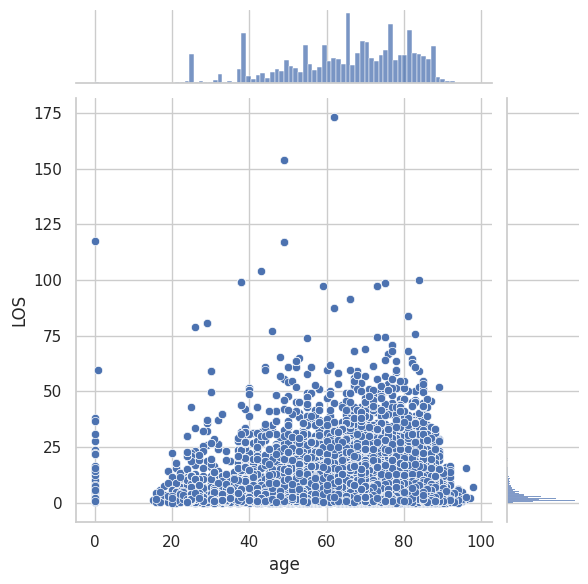

In [81]:
# Create a joint plot using Seaborn
sns.set(style="whitegrid")
sns.jointplot(data=merged_data_icu, x='age', y='LOS', kind='scatter')
plt.show()

FacetGrid is used for creating a grid of subplots, where each subplot represents a subset of the data based on one or more categorical variables.

FacetGrid allows you to compare different groups or categories within your data and see how relationships or distributions vary across them.

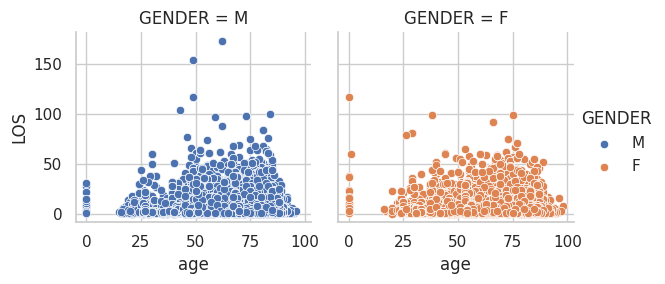

In [83]:
# Create a facet grid of joint plots for each gender
g = sns.FacetGrid(merged_data_icu, col='GENDER', hue='GENDER')
g.map(sns.scatterplot, 'age', 'LOS')
g.add_legend()
plt.show()

1. Distribution of ICU Stays by Admission Type and Gender


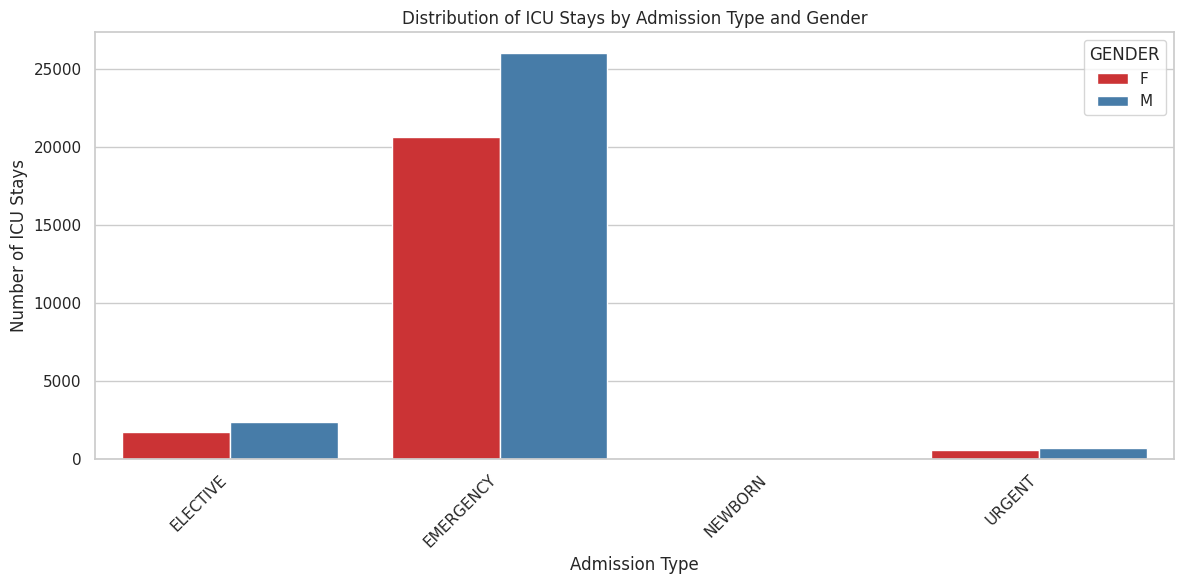

In [84]:
# Group the data by admission type and gender
admission_type_gender = merged_data_icu.groupby(['ADMISSION_TYPE', 'GENDER'])['ICUSTAY_ID'].count().reset_index()

# Plot the distribution using a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=admission_type_gender, x='ADMISSION_TYPE', y='ICUSTAY_ID', hue='GENDER', palette='Set1')
plt.title('Distribution of ICU Stays by Admission Type and Gender')
plt.xlabel('Admission Type')
plt.ylabel('Number of ICU Stays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. Relationship between Age and LOS, Colored by Insurance


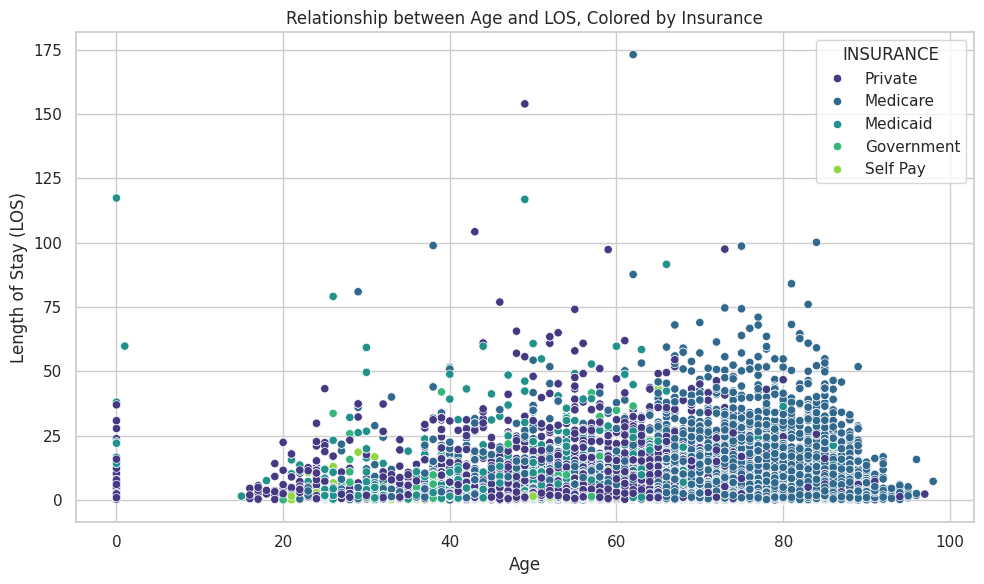

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_icu, x='age', y='LOS', hue='INSURANCE', palette='viridis')
plt.title('Relationship between Age and LOS, Colored by Insurance')
plt.xlabel('Age')
plt.ylabel('Length of Stay (LOS)')
plt.tight_layout()
plt.show()

3. Distribution of Top Diagnoses for Different Age Groups


<ipython-input-86-944c3038a2e6>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-944c3038a2e6>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



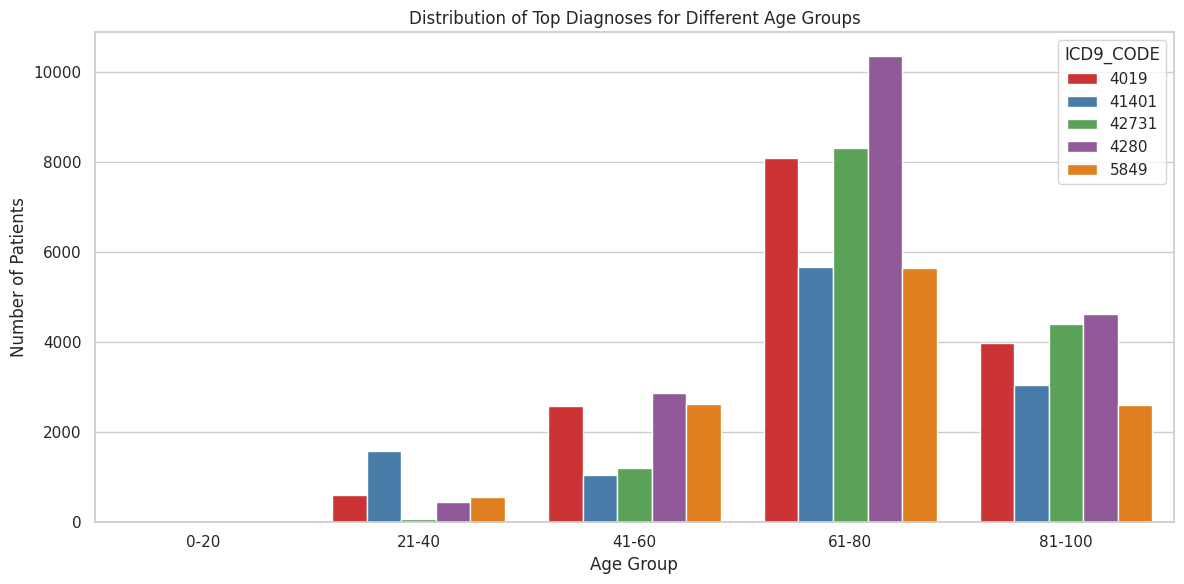

In [86]:
# Filter the data for the top 5 diagnoses for all patients
top_diagnoses = merged_data_diagnosis['ICD9_CODE'].value_counts().head(5).index.tolist()
filtered_data = merged_data_diagnosis[merged_data_diagnosis['ICD9_CODE'].isin(top_diagnoses)]

# Create age groups
bins = [0, 20, 40, 60, 80, 100]  # Define age bins
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']  # Define age group labels
filtered_data['Age Group'] = pd.cut(filtered_data['age'], bins=bins, labels=labels)

# Group the data by age group and diagnosis
age_diagnosis = filtered_data.groupby(['Age Group', 'ICD9_CODE'])['SUBJECT_ID'].count().reset_index()

# Plot the distribution using a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=age_diagnosis, x='Age Group', y='SUBJECT_ID', hue='ICD9_CODE', palette='Set1')
plt.title('Distribution of Top Diagnoses for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

4. Correlation Heatmap between Numerical Variables


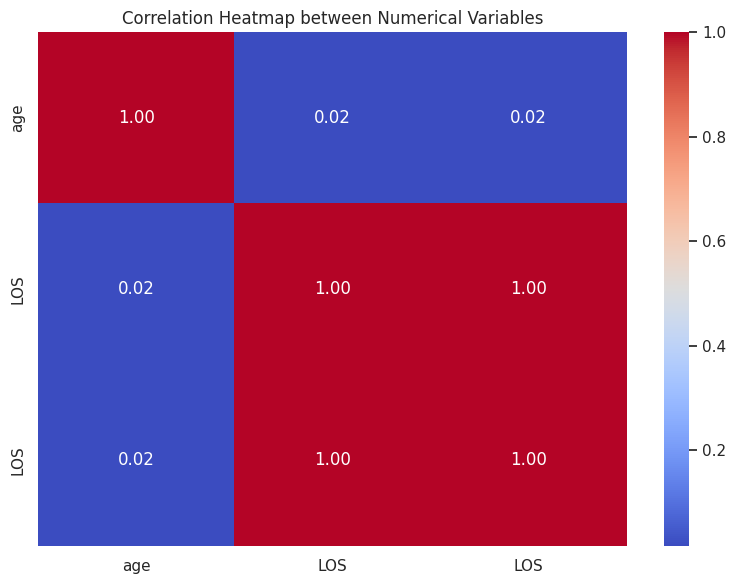

In [88]:
# Select numerical variables for correlation analysis
numerical_vars = ['age', 'LOS', 'LOS']
correlation_data = merged_data_icu[numerical_vars]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Numerical Variables')
plt.tight_layout()
plt.show()

5. Time Series of ICU Admissions by Admission Source


In [89]:
# Convert the admission time to datetime objects
merged_data_icu['ADMITTIME'] = pd.to_datetime(merged_data_icu['ADMITTIME'])

# Group the data by admission time and source
icu_admissions = merged_data_icu.groupby([merged_data_icu['ADMITTIME'].dt.date, 'ADMISSION_LOCATION'])['ICUSTAY_ID'].count().reset_index()

# Plot the time series using Plotly
fig = px.line(icu_admissions, x='ADMITTIME', y='ICUSTAY_ID', color='ADMISSION_LOCATION',
              title='Time Series of ICU Admissions by Admission Source',
              labels={'ADMITTIME': 'Date', 'ICUSTAY_ID': 'Number of Admissions'})
fig.show()

In summary, jointplot is used to visualize the relationship between two numeric variables, whereas FacetGrid is used to create a grid of subplots for comparing relationships or distributions within different categorical groups. The choice between the two depends on whether you're focusing on the relationship between two variables (for jointplot) or exploring different aspects of your data across categories (for FacetGrid).